<a href="https://colab.research.google.com/github/stefaniemeliss/IADS_SC_2022_DT/blob/main/DecisionTrees_IADS_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

A **decision tree** is a supervised machine learning model used to predict a target by learning decision rules from features. As the name suggests, we can think of this model as breaking down our data by making a decision based on asking a series of questions.


Based on the features in our training set, the decision tree model learns a series of questions to infer the class labels of the samples. As we can see, decision trees are attractive models if we care about interpretability.

Although the preceding figure illustrates the concept of a decision tree based on categorical targets (**classification**), the same concept applies if our targets are real numbers (**regression**).





In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset for Classification




> **Dataset:**  [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris).



*   **Number of Instances:** 
    *   150 (50 in each of three classes)
*   **Number of Attributes:**
    *   4 numeric, predictive attributes and the class

*   **Attribute Information:**
    *   sepal length in cm
    *   sepal width in cm
    *   petal length in cm
    *   petal width in cm

*   **Classes:**
    *   Setosa (0)
    *   Versicolour (1)
    *   Virginica (2)
    






# Classification Code


In [59]:
from sklearn import datasets  # DATA
from sklearn.model_selection import train_test_split # to Split Train-Test data
from sklearn import tree # To get Decision Tree 
from sklearn import metrics # To generate evaluation metrices
from sklearn.model_selection import cross_val_predict # To generate evaluation metrices
from sklearn.model_selection import cross_val_score # To generate evaluation metrices


from sklearn.tree import export_graphviz # exporting the tree structure as dot file
from pydotplus.graphviz import graph_from_dot_data # export png image from dot file
from IPython.display import Image, SVG  # Show the image within colab notebook
from graphviz import Source # Show the image within colab notebook
import matplotlib.pyplot as plt # Plotting

import pandas as pd # for basic data manipulations 
import numpy as np # for basic data manipulations 

import warnings
warnings.filterwarnings('ignore')



### 1. Load Data

In [60]:
#load data and see meta info
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

### 2. Explore Data


In [61]:
# print type and shape of data
print(type(iris.data))
print(type(iris.target))

print(iris.data.shape)
print(iris.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


### 3. Create Panda Dataframe and do data manipulations

In [62]:
dfCls = pd.DataFrame(iris.data, columns=iris.feature_names)
dfCls.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
# Add target data to the panda dataframe
dfCls['target'] = iris.target
dfCls.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 4. Split the data for Training and Testing

In [64]:
X_train, X_test, y_train, y_test = train_test_split(dfCls.drop(['target'],axis='columns'), iris.target, test_size=0.2, random_state=0, stratify=iris.target)
# random_state: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls
# stratify: If not None, data is split in a stratified fashion, using this as the class labels. The splits are made by preserving the percentage of samples for each class.

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


### 5. Initialise a Decision Tree Classifier

In [65]:
dtClassifier = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

# class_weight: Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
# criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# max_features: The number of features to consider when looking for the best split.
# max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
# min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
# random_state: Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. 
# splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.


# New section

> ***Let's dig into*** **[tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**

Note that recall is calculated in the same way as **sensitivity** (i.e., Out of all the people that have the disease, how many got positive test results?).

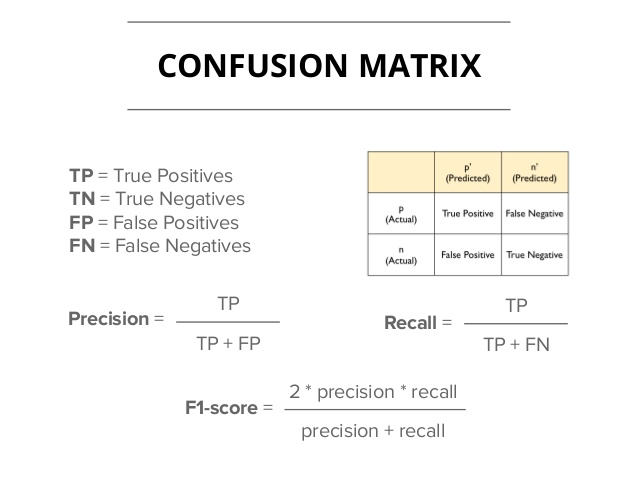

In [66]:
Image('/content/drive/MyDrive/Colab Notebooks/eval-class.jpg', width=800, height=500)

### 6. Model Evaluation on Train data

In [67]:
#perform 10 fold cross validation and plot the CM
CV_predicted = cross_val_predict(dtClassifier, X_train, y_train, cv=10) #CV predicted values (training data); determines the cross-validation splitting strategy
CV_score = cross_val_score(dtClassifier, X_train, y_train, cv=10) #CV model score (training data)

print("Cross validation Score on train data: ",CV_score.mean())
print("\n")

print("Confusion matrix on CV predictions (train data)")
print(metrics.confusion_matrix(y_train, CV_predicted)) # confusion matrix on CV predictions (train data)
print("\n")

print("Classification report CV predictions (train data)")
print(metrics.classification_report(y_train, CV_predicted, target_names=['Setosa', 'Versicolor', 'Virginica'])) # classification report CV predictions (train data)


Cross validation Score on train data:  0.9333333333333333


Confusion matrix on CV predictions (train data)
[[40  0  0]
 [ 0 36  4]
 [ 0  4 36]]


Classification report CV predictions (train data)
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        40
  Versicolor       0.90      0.90      0.90        40
   Virginica       0.90      0.90      0.90        40

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



### 7. Let's fit the DT model on Training data and perform prediction with the Test data 

In [68]:
dtClassifier.fit(X_train,y_train)

y_predicted = dtClassifier.predict(X_test)

### 8. Model Evaluation on Test Data

In [69]:
mdl_score = dtClassifier.score(X_test,y_test) #model score (test data)
print ("Model Score on test data:",mdl_score)
print("\n")

print("Confusion matrix (test data)")
print(metrics.confusion_matrix(y_test, y_predicted)) #confusion matrix (test data)
print("\n")

print("Classification report (test data)")
print(metrics.classification_report(y_test, y_predicted, target_names=['Setosa', 'Versicolor', 'Virginica'])) # classification report (test data)

Model Score on test data: 0.9666666666666667


Confusion matrix (test data)
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


Classification report (test data)
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.91      1.00      0.95        10
   Virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 10. Plot the trained DT structure for visualisation

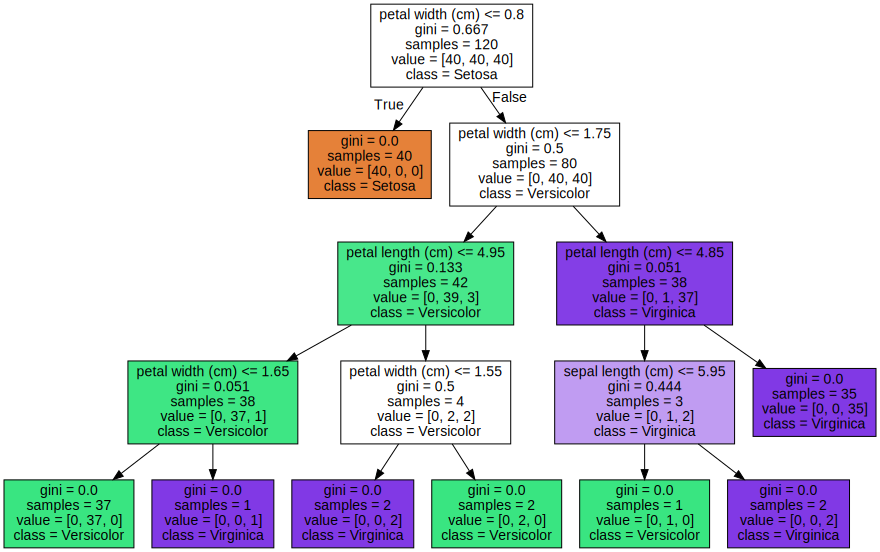

In [70]:
# Plot the smallest tree
graph = Source(export_graphviz(dtClassifier, out_file=None, 
                               feature_names=X_train.columns, filled=True, 
                               class_names=['Setosa', 'Versicolor','Virginica']))

SVG(graph.pipe(format='svg'))

# Dataset for Regression



> **Dataset:**  [Boston house-price](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)



*   **Number of Instances:** 
    *   	506
*   **Number of Attributes:**
    *   13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

*   **Attribute Information:**
    *   CRIM per capita crime rate by town
    *   ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    *   INDUS proportion of non-retail business acres per town
    *   CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    *   NOX nitric oxides concentration (parts per 10 million)
    *   RM average number of rooms per dwelling
    *   AGE proportion of owner-occupied units built prior to 1940
    *   DIS weighted distances to five Boston employment centres
    *   RAD index of accessibility to radial highways
    *   TAX full-value property-tax rate per \$10,000
    *   PTRATIO pupil-teacher ratio by town
    *   B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    *   LSTAT \% lower status of the population
    *   MEDV Median value of owner-occupied homes in \$1000’s








# Regression Code

### 1. Load Data

In [71]:
#load data and see meta info
boston = datasets.load_boston()
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

### 2. Explore Data

In [72]:
# print type and shape of data
print(type(boston.data))
print(type(boston.target))

print(boston.data.shape)
print(boston.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506,)


### 3. Create Panda Dataframe and do data manipulations

In [73]:
dfReg = pd.DataFrame(boston.data, columns=boston.feature_names)
dfReg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [74]:
# Add target data to the panda dataframe
dfReg['target'] = boston.target
dfReg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [75]:
dfReg.describe() # Description of data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [76]:
dfReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 4. Split the data for Training and Testing

In [77]:
X_train, X_test, y_train, y_test = train_test_split(dfReg.drop(['target'],axis='columns'),boston.target,test_size=0.1,random_state=0)
print(X_train.shape)
print(X_test.shape)

(455, 13)
(51, 13)


### 5. Initialise a Decision Tree Regressor

In [78]:
dtRegressor = tree.DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=0, splitter='best')



> ***Let's dig into*** **[tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)**






### 6. Model Performance on Train data

Crossvalidation Coefficient of determination on training set : 0.6212788221993994




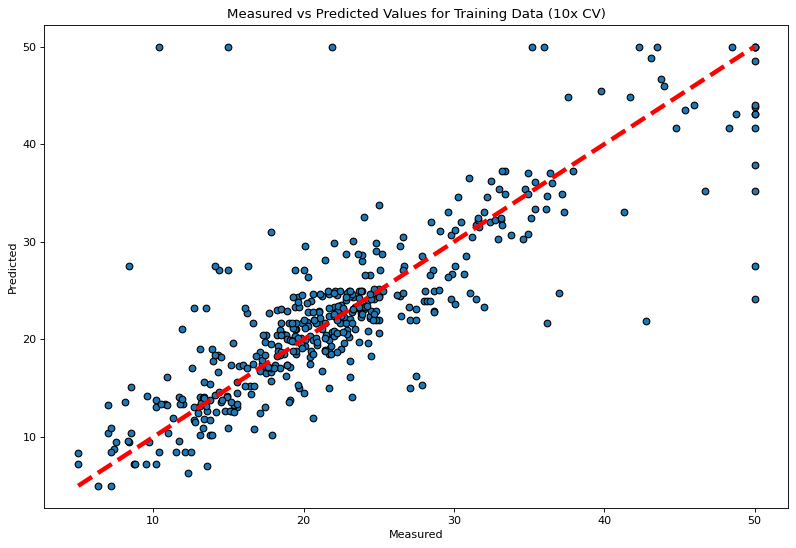

In [79]:
CV_predicted = cross_val_predict(dtRegressor, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(dtRegressor, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)
print("\n")
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

### 7.  Let's fit the DT model on Training data and perform prediction with the Test data 

In [80]:
dtRegressor.fit(X_train,y_train)

y_predicted = dtRegressor.predict(X_test)

### 8. Model Performance on Test data

In [81]:
r2_score = dtRegressor.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

Coefficient of determination on test set:  0.6295723977332057

Mean Squared Error on test set : 31.865686274509805


### 9. Visualisation

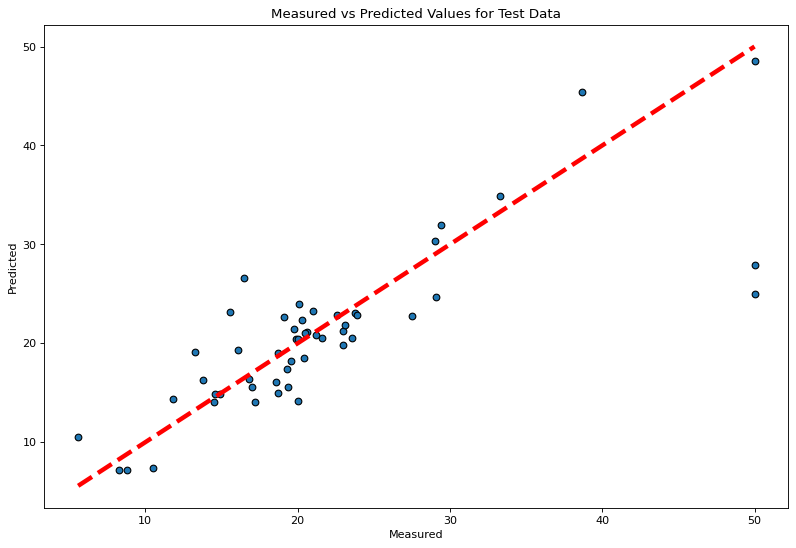

In [82]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()

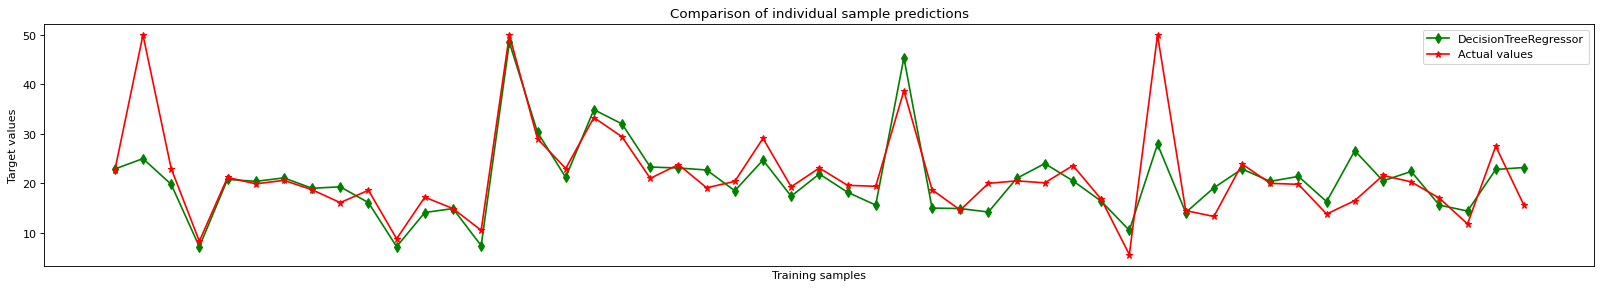

In [83]:
# Plot a one-to-one comparison of measured values vs predicted values
plt.figure(num=None, figsize=(25, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_predicted, 'gd-', label='DecisionTreeRegressor')
plt.plot(y_test, 'r*-', label='Actual values')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Target values')
plt.xlabel('Training samples')
plt.legend(loc="best")
plt.title('Comparison of individual sample predictions')
plt.show()

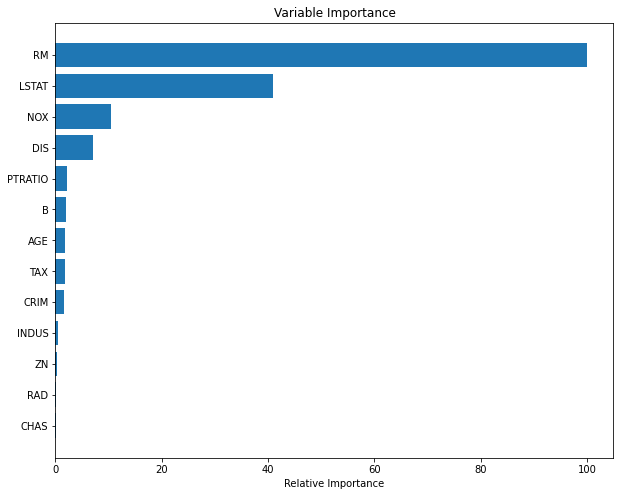

In [84]:
# #############################################################################
# Plot feature importance
feature_importance = dtRegressor.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = range(X_train.shape[1]);

plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()